In [182]:
import pickle   
import pandas as pd  
from sklearn.model_selection import train_test_split 
#from preprocessor import *  
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [183]:
import os
os.listdir()


['.ipynb_checkpoints',
 'catboost_info',
 'dhanajay.ipynb',
 'heartdisease.ipynb',
 'heartdisease.pkl',
 'labels.csv',
 'values.csv']

In [184]:
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

In [185]:
import math
def same(x):
    return x

In [186]:


with open("heartdisease.pkl", "rb") as f:
    preprocessor = pickle.load(f)


In [187]:
df1=pd.read_csv("labels.csv")
df2=pd.read_csv("values.csv")

In [188]:
df=pd.merge(df1,df2,on="patient_id",how="inner")

In [189]:
preprocessor

ColumnTransformer(transformers=[('Label_encoder', ModifiedLabelEncoder(),
                                 ['thal']),
                                ('minmax_scaler', MinMaxScaler(),
                                 ['age', 'max_heart_rate_achieved',
                                  'oldpeak_eq_st_depression',
                                  'serum_cholesterol_mg_per_dl',
                                  'resting_blood_pressure']),
                                ('Pass_through',
                                 FunctionTransformer(func=<function same at 0x0000017F3C946DE0>),
                                 ['slope_of_peak_exercise_st_segment',
                                  'chest_pain_type', 'num_major_vessels',
                                  'fasting_blood_sugar_gt_120_mg_per_dl',
                                  'resting_ekg_results', 'sex',
                                  'exercise_induced_angina'])])

In [190]:
X = df.drop("patient_id", axis=1)# splitting data for training and testing
y = df["heart_disease_present"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [191]:
X_train_transformed = preprocessor.fit_transform(X_train)#transformmed by passing through preprocessor object
X_test_transformed = preprocessor.transform(X_test)

In [192]:
from sklearn.linear_model import LogisticRegression # creating model
model = LogisticRegression()
model.fit(X_train_transformed, y_train)


LogisticRegression()

In [193]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score, classification_report#evalution metrics
y_pred1=model.predict(X_test_transformed)
print("accuracy",accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


accuracy 0.8611111111111112
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [194]:
from sklearn.svm import SVC  # # assign Support vector classifier
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train_transformed,y_train)

SVC()

In [233]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('svc', SVC(probability=True))
])


In [195]:
y_pred2 = svclassifier.predict(X_test_transformed)
print("accuracy",accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

accuracy 0.8888888888888888
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



In [196]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [197]:
from xgboost import XGBClassifier
xgb11=XGBClassifier() ## object creation
xgb11.fit(X_train_transformed,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [198]:
y_pred11 =xgb11.predict(X_test_transformed)
print("accuracy",accuracy_score(y_test, y_pred11))
print(classification_report(y_test, y_pred11))

accuracy 0.8333333333333334
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



In [199]:
xgb12=XGBClassifier(reg_lambda= 0, reg_alpha= 0.2, n_estimators=50, max_depth=5, learning_rate=0.1, gamma=0.4)
xgb12.fit(X_train_transformed,y_train)#training

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [200]:
y_pred12 =xgb12.predict(X_test_transformed)
print("accuracy",accuracy_score(y_test, y_pred12))
print(classification_report(y_test, y_pred12))

accuracy 0.8055555555555556
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.88      0.75      0.81        20

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36



In [201]:
from sklearn.tree import DecisionTreeClassifier        #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()             #object creation for decision tree
dt.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [202]:
y_pred3 =dt.predict(X_test_transformed)
print("accuracy", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

accuracy 0.7777777777777778
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        16
           1       0.93      0.65      0.76        20

    accuracy                           0.78        36
   macro avg       0.81      0.79      0.78        36
weighted avg       0.82      0.78      0.78        36



In [203]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)

In [204]:
rf_clf = RandomForestClassifier() # Assigning RandomForest CLassifier into variable
rf_clf.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [205]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_transformed, y_train = sm.fit_resample(X_train_transformed, y_train)


In [206]:
y_pred4=rf_clf.predict(X_test_transformed)
print("accuracy", accuracy_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

accuracy 0.8055555555555556
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



In [207]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [208]:
from catboost import CatBoostClassifier


In [209]:
# CatBoost model (best settings for accuracy + recall)
modele = CatBoostClassifier( iterations=600,depth=6,learning_rate=0.05,loss_function='Logloss',eval_metric='Recall',     
class_weights=[1, 3],verbose=False)

In [210]:
#modele=CatBoostClassifier()
modele.fit(X_train_transformed,y_train)

In [211]:
y_pred5=modele.predict(X_test_transformed)

accuracy 0.8055555555555556
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.88      0.75      0.81        20

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36



In [212]:
def get_scores(y_test, y_pred):
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted")}

In [213]:
results = []
results.append({"Model": "XGBoost", **get_scores(y_test, y_pred11)})
results.append({"Model": "XGBoost", **get_scores(y_test, y_pred12)})
results.append({"Model": "Decision Tree", **get_scores(y_test, y_pred3)})
results.append({"Model": "svclassifier", **get_scores(y_test, y_pred2)})
results.append({"Model": "LogisticRegression", **get_scores(y_test, y_pred1)})
results.append({"Model": "RandomForestClassifier", **get_scores(y_test, y_pred4)})
results.append({"Model": "catboost", **get_scores(y_test, y_pred5)})
results_df = pd.DataFrame(results)
print(results_df)

                    Model  accuracy  Precision    Recall  F1-score
0                 XGBoost  0.833333   0.854167  0.833333  0.833333
1                 XGBoost  0.805556   0.817681  0.805556  0.806006
2           Decision Tree  0.777778   0.818903  0.777778  0.775714
3            svclassifier  0.888889   0.911111  0.888889  0.888889
4      LogisticRegression  0.861111   0.894180  0.861111  0.860575
5  RandomForestClassifier  0.805556   0.835979  0.805556  0.804805
6                catboost  0.805556   0.817681  0.805556  0.806006


In [214]:
df

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

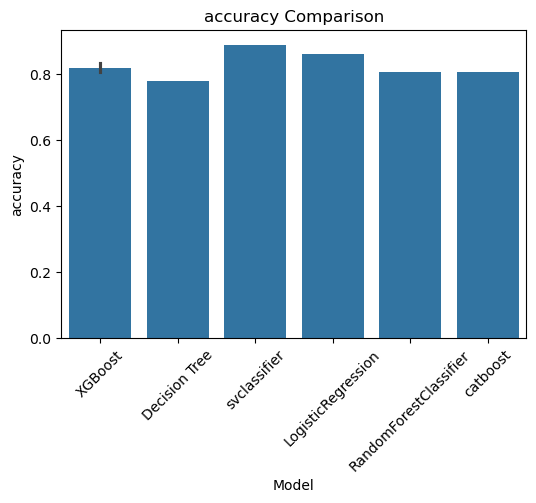

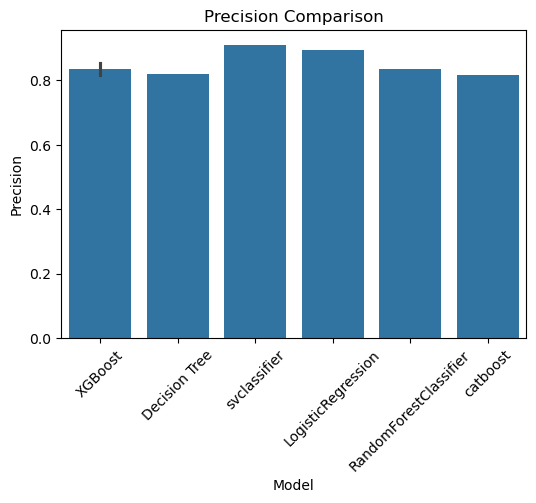

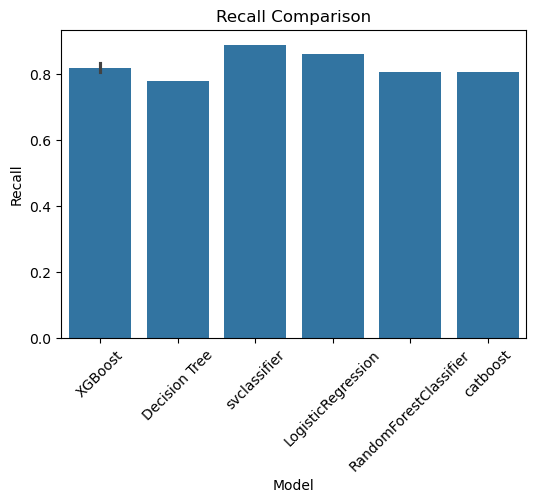

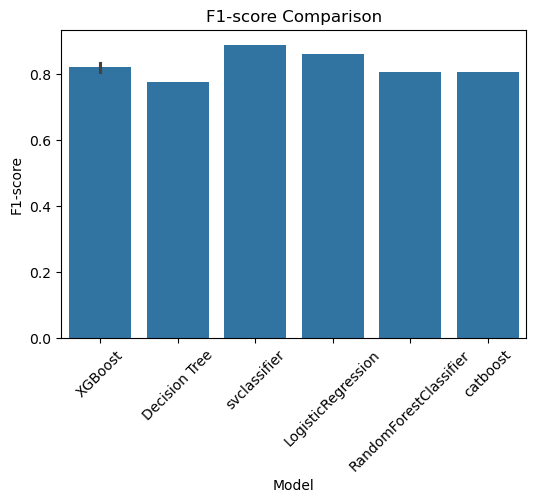

In [216]:
metrics = ['accuracy', 'Precision', 'Recall', 'F1-score']
for metric in metrics:
    plt.figure(figsize=(6,4))
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
plt.show()